# **Starting my FYP Project**

## **Music Features Detection (F,A,Phase)**

In [ ]:
from google.colab import files
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa.display

# Step 1: Upload an audio file
uploaded = files.upload()
audio_path = list(uploaded.keys())[0]  # Get the uploaded file name

Saving Asharp3-5-sfm.wav to Asharp3-5-sfm.wav


In [ ]:
# Step 2: Play the audio file
Audio(audio_path)

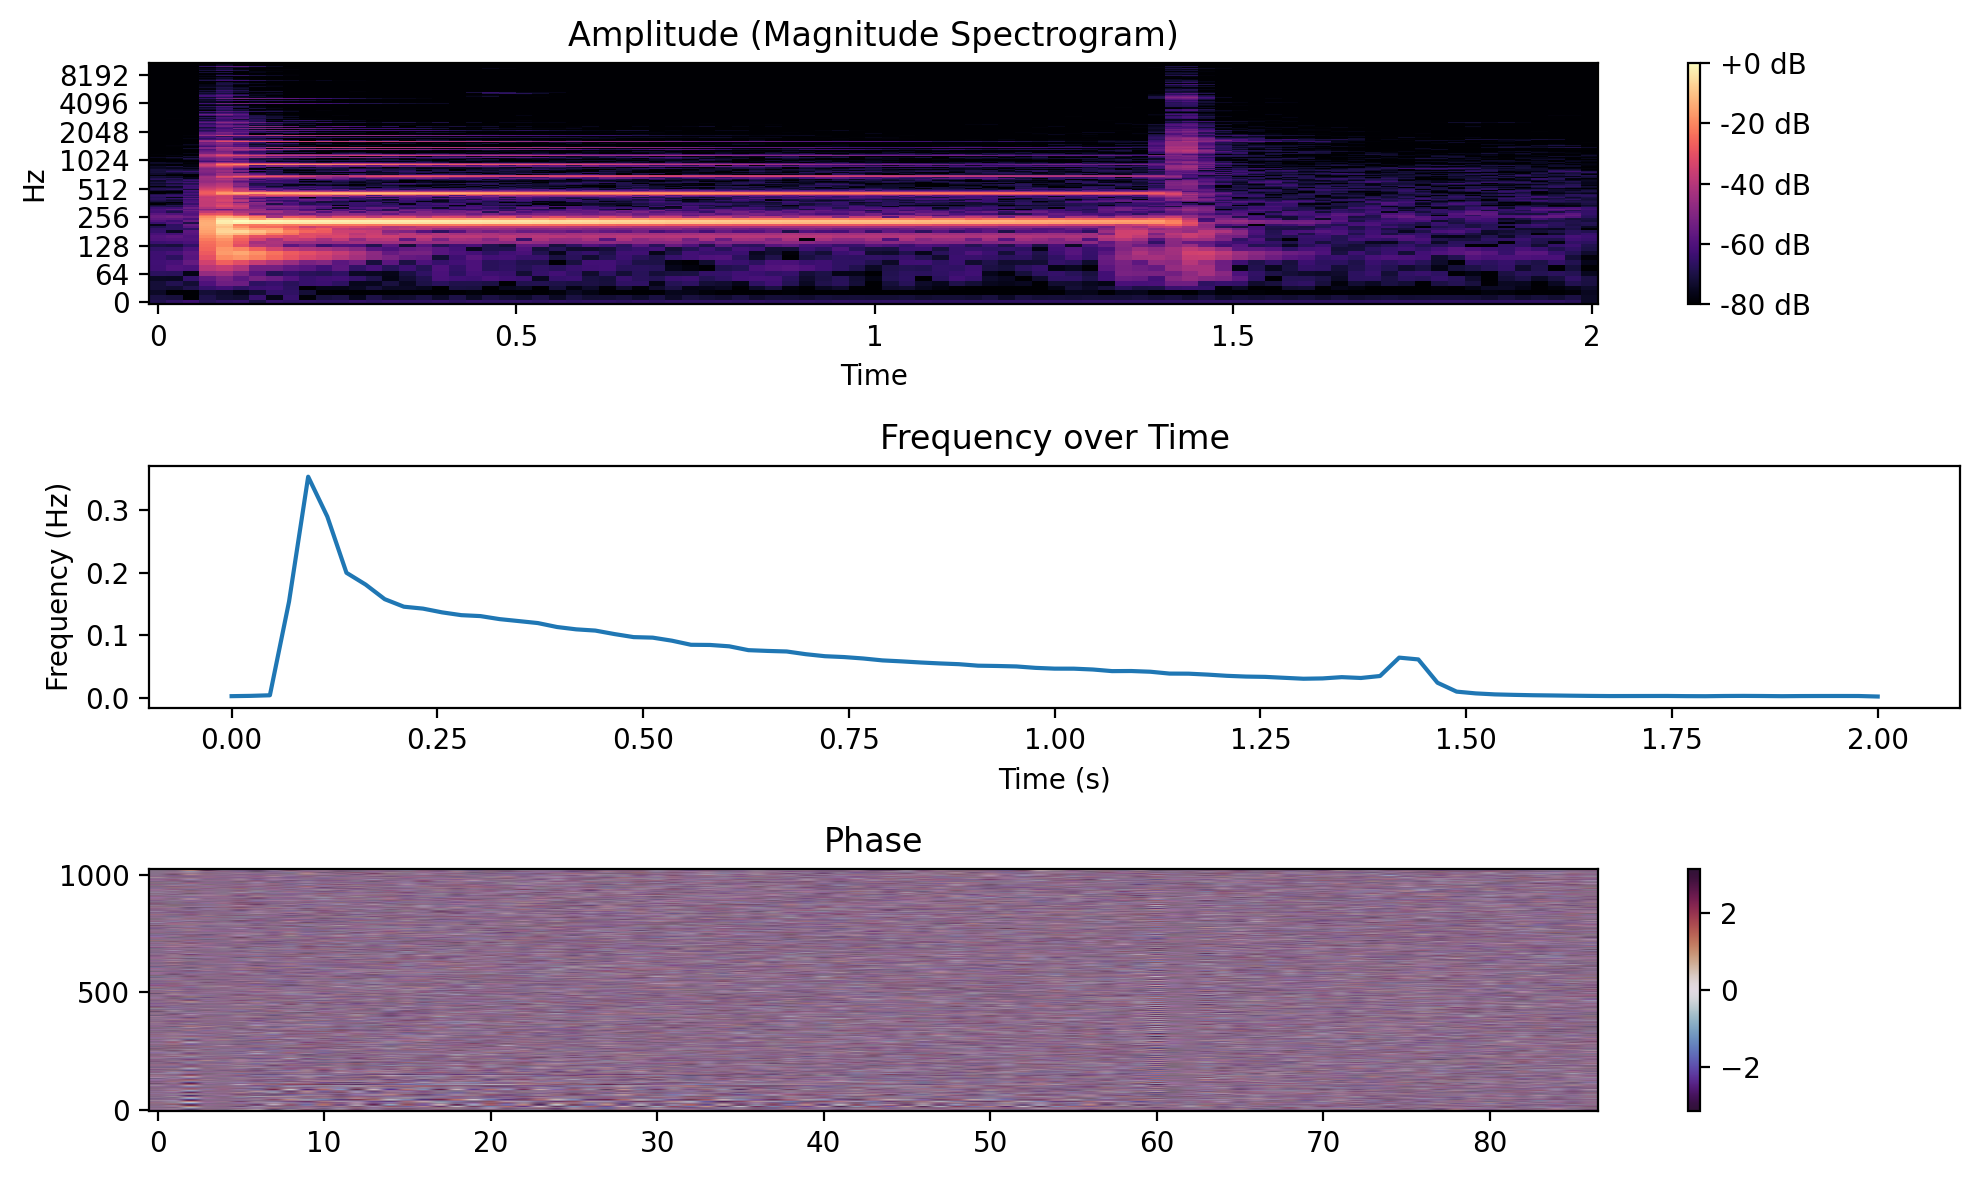

In [ ]:
# Step 3: Load the audio file
y, sr = librosa.load(audio_path)

# Step 4: Compute the Short-Time Fourier Transform (STFT) of the audio
stft = librosa.stft(y)
amplitude = np.abs(stft)  # Amplitude
phase = np.angle(stft)    # Phase
frequencies = np.linspace(0, sr / 2, amplitude.shape[0])

# Step 5: Plot Amplitude, Frequency, and Phase
plt.figure(figsize=(10, 6))

# Amplitude plot
plt.subplot(3, 1, 1)
plt.title('Amplitude (Magnitude Spectrogram)')
librosa.display.specshow(librosa.amplitude_to_db(amplitude, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')

# Frequency plot
plt.subplot(3, 1, 2)
plt.title('Frequency over Time')
plt.plot(np.linspace(0, len(y)/sr, len(amplitude[0])), np.mean(amplitude, axis=0))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Phase plot
plt.subplot(3, 1, 3)
plt.title('Phase')
plt.imshow(phase, aspect='auto', cmap='twilight_shifted', origin='lower')
plt.colorbar()
plt.tight_layout()
plt.show()

## **2nd Part (Clip to PDF)**

### **Audio Preprocessing Script**

In [ ]:
from google.colab import files

# Step 1: Install dependencies (latest version of FFmpeg)
print("Installing FFmpeg (latest version)...")
!apt-get update -qq
!apt-get install -y ffmpeg

# Verify FFmpeg version
print("\nVerifying installed FFmpeg version...")
!ffmpeg -version | head -n 1
print("FFmpeg installed and verified.\n")

# Step 2: Preprocess Audio with FFmpeg
def preprocess_audio(input_file):
    print("Step 2: Preprocess Audio with FFmpeg")
    output_file = "preprocessed_audio.wav"

    # Convert to mono WAV, 44.1 kHz, 16-bit
    !ffmpeg -i "$input_file" -ac 1 -ar 44100 -acodec pcm_s16le "$output_file" -y

    if not os.path.exists(output_file):
        raise RuntimeError("FFmpeg preprocessing failed. Output file not created.")

    print("Preprocessing complete. Downloading preprocessed audio...")
    files.download(output_file)
    return output_file

# Execute Step 2 using previously uploaded file
try:
    preprocessed_file = preprocess_audio(audio_path)
    print("\nStep 2 completed successfully!")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Installing FFmpeg (latest version)...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.

Verifying installed FFmpeg version...
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
FFmpeg installed and verified.

Step 2: Preprocess Audio with FFmpeg
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --en

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Step 2 completed successfully!


### **Audio Separation with Demucs**

In [ ]:
import shutil
import os

print("Installing Demucs (latest version)...")
!pip install --upgrade pip -q
!pip install demucs -q --upgrade   # model

# Verify Demucs version
print("\nVerifying installed Demucs version...")
!pip show demucs | grep Version
print("Demucs installed and verified.\n")

# Step 2: Separate Other with Demucs
def separate_other():
    print("\nStep 2: Separate Other with Demucs")

    # Define the path to the preprocessed audio in Colab storage
    preprocessed_audio_path = "/content/preprocessed_audio.wav"  # Modify if needed

    if not os.path.exists(preprocessed_audio_path):
        raise FileNotFoundError(f"Preprocessed audio file not found at {preprocessed_audio_path}. Ensure it exists before running this step.")

    output_dir = "demucs_output"

    # Run Demucs to separate the "other" track
    print(f"Processing {preprocessed_audio_path} with Demucs...")
    !demucs --two-stems other "$preprocessed_audio_path" -o "$output_dir"

    # The output "other" track is usually in a subdirectory
    other_file = os.path.join(output_dir, "htdemucs", "preprocessed_audio", "other.wav")
    if not os.path.exists(other_file):
        raise RuntimeError(f"Demucs separation failed. 'Other' track not found at {other_file}. Check output directory: {os.listdir(output_dir)}")

    # Rename and move the file for easier access
    separated_other_file = "separated_other.wav"
    print(f"Copying {other_file} to {separated_other_file}...")
    shutil.copy(other_file, separated_other_file)

    # Verify the copied file exists
    if not os.path.exists(separated_other_file):
        raise RuntimeError(f"Failed to copy file to {separated_other_file}. Check permissions or disk space.")

    print(f"File size of {separated_other_file}: {os.path.getsize(separated_other_file)} bytes")
    print("Other separation complete. Attempting to download separated 'other' audio...")

    try:
        from google.colab import files
        files.download(separated_other_file)
        print(f"Successfully downloaded {separated_other_file}")
    except Exception as download_error:
        print(f"Download failed: {str(download_error)}. File is available at {separated_other_file}. You can manually download it or check Colab runtime.")

    return separated_other_file

# Execute Step 2
try:
    separate_other()
    print("\nStep 2 completed successfully!")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Installing Demucs (latest version)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully downloaded separated_other.wav

Step 2 completed successfully!


### **Extract only Guitar From Others**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow librosa matplotlib numpy soundfile

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
169/169 ━━━━━━━━━━━━━━━━━━━━ 136s 781ms/step - accuracy: 0.9289 - loss: 1.1151 - val_accuracy: 0.8785 - val_loss: 1.4891 - learning_rate: 0.0010
Epoch 2/3
169/169 ━━━━━━━━━━━━━━━━━━━━ 143s 788ms/step - accuracy: 0.9811 - loss: 0.3620 - val_accuracy: 0.8415 - val_loss: 3.0367 - learning_rate: 0.0010
Epoch 3/3
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 856ms/step - accuracy: 0.9758 - loss: 0.3413 - val_accuracy: 1.0000 - val_loss: 1.1118e-04 - learning_rate: 0.0010
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 1.0000 - loss: 2.6542e-04
✅ Model Accuracy: 1.0000
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step


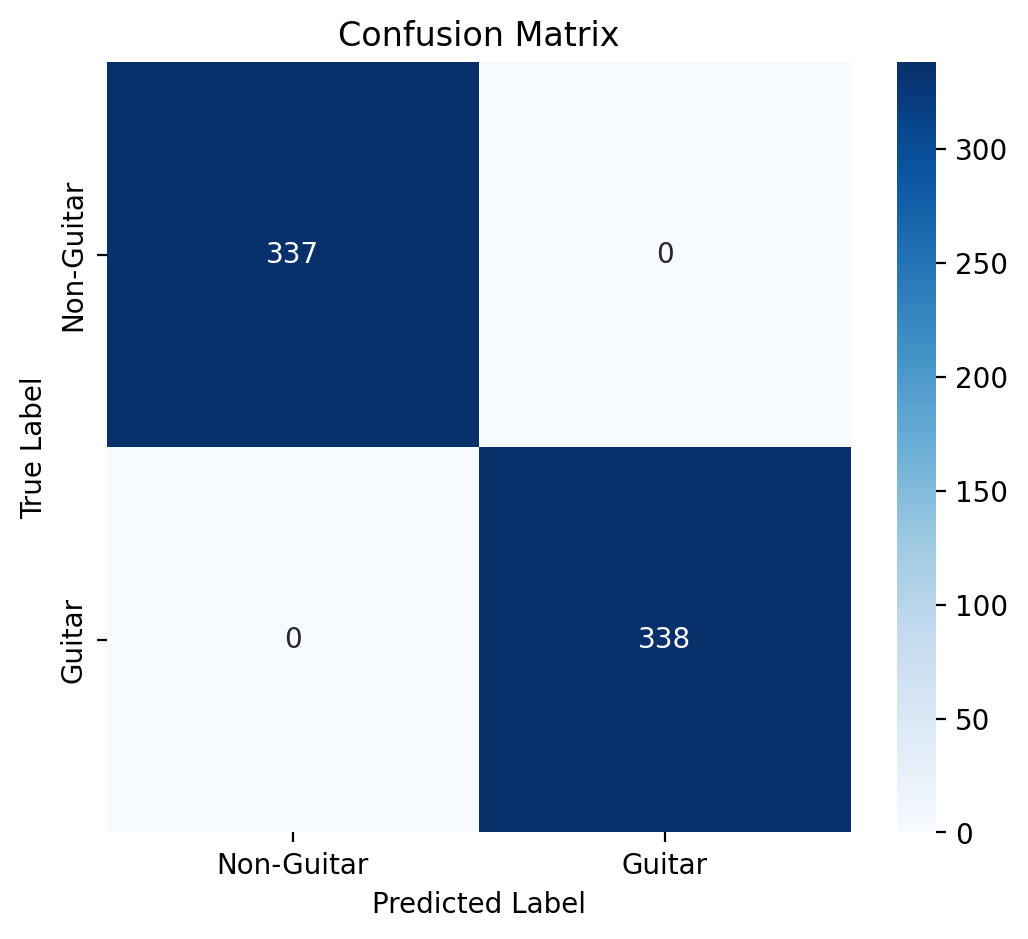


Classification Report:
               precision    recall  f1-score   support

  Non-Guitar       1.00      1.00      1.00       337
      Guitar       1.00      1.00      1.00       338

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

🎵 Processing file: separated_other.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
❌ No Guitar Sound Detected (Confidence: 0.00)


In [ ]:
# CNN - CNN-Based Guitar Sound Detection 🎸🎸🎸🎸

import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import soundfile as sf

# ------------------- Feature Extraction: Convert Audio to Spectrogram -------------------
def extract_spectrogram(file_path):
    """Convert audio file to Mel Spectrogram and return as an image-like array."""
    y, sr = librosa.load(file_path, sr=22050)  # Load audio
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)  # Compute Mel Spectrogram
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to log scale

    # Resize to fixed shape (128x128)
    mel_spec_resized = np.resize(mel_spec_db, (128, 128))

    return mel_spec_resized, y, sr  # Return spectrogram + raw audio + sample rate

# ------------------- Load Dataset -------------------
def load_data(guitar_dir, non_guitar_dir):
    """Load dataset, extract spectrogram features, and assign labels."""
    features, labels = [], []

    for folder, label in [(guitar_dir, 1), (non_guitar_dir, 0)]:
        for file in os.listdir(folder):
            if file.endswith(('.wav', '.mp3')):
                file_path = os.path.join(folder, file)
                spectrogram, _, _ = extract_spectrogram(file_path)
                features.append(spectrogram)
                labels.append(label)

    X, y = np.array(features), np.array(labels)
    X = X.reshape(X.shape[0], 128, 128, 1)  # Reshape for CNN (128x128x1)
    y = to_categorical(y, 2)  # Convert labels to one-hot encoding

    return X, y

# Paths to dataset
guitar_dir = '/content/drive/MyDrive/extra/guitar_dataset'
non_guitar_dir = '/content/drive/MyDrive/extra/non_guitar_dataset'

# Load data
X, y = load_data(guitar_dir, non_guitar_dir)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ------------------- Build Optimized CNN Model -------------------
def build_optimized_cnn():
    """Create an optimized CNN model for guitar sound classification."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.4),  # Increased dropout for regularization
        Dense(2, activation='softmax')  # 2 output classes (guitar / non-guitar)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model
model = build_optimized_cnn()

# Callbacks to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train model with callbacks
model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test),
          callbacks=[early_stopping, reduce_lr])

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Model Accuracy: {acc:.4f}")

# ------------------- Confusion Matrix -------------------
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Guitar", "Guitar"], yticklabels=["Non-Guitar", "Guitar"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=["Non-Guitar", "Guitar"]))

# ------------------- Detect Guitar Sound & Extract It -------------------
def detect_and_save_guitar(input_file, output_file="guitar.wav", segment_length=1.0, threshold=0.6):
    """Detect guitar in an audio file and save the guitar segments if found."""
    print(f"🎵 Processing file: {input_file}")

    spectrogram, y, sr = extract_spectrogram(input_file)  # Extract spectrogram and raw audio
    spectrogram = spectrogram.reshape(1, 128, 128, 1)  # Reshape for CNN

    # Predict if the audio contains guitar
    prediction_prob = model.predict(spectrogram)[0][1]  # Probability of guitar class (1)

    if prediction_prob >= threshold:
        print(f"✅ Guitar Detected (Confidence: {prediction_prob:.2f})")

        # Extract guitar sound by processing in segments
        segment_samples = int(segment_length * sr)
        guitar_segments = []

        for i in range(0, len(y), segment_samples):
            segment = y[i:i + segment_samples]
            if len(segment) < segment_samples:
                break

            segment_spec, _, _ = extract_spectrogram(input_file)  # Extract spectrogram for segment
            segment_spec = segment_spec.reshape(1, 128, 128, 1)

            segment_prediction = model.predict(segment_spec)[0][1]  # Get prediction

            if segment_prediction >= threshold:
                guitar_segments.append(segment)

        # If guitar segments exist, save them
        if guitar_segments:
            extracted_guitar = np.concatenate(guitar_segments)
            sf.write(output_file, extracted_guitar, sr)
            print(f"🎸✅ Guitar sound extracted and saved as {output_file}")
        else:
            print("❌ Guitar detected, but no extractable segments found.")

    else:
        print(f"❌ No Guitar Sound Detected (Confidence: {prediction_prob:.2f})")

# ------------------- Run Guitar Detection -------------------
new_audio_file = "separated_other.wav"
detect_and_save_guitar(new_audio_file)

In [ ]:
from google.colab import files
import os
# Step 2: List uploaded files
print("Files in the current directory:")
uploaded_files = os.listdir()
for file in uploaded_files:
    print(file)

Files in the current directory:
preprocessed_audio.wav
separated_other.wav
demucs_output
drive
drum-sound1.wav


In [ ]:
# from google.colab import files
# files.download('guitar.wav')

### **Music Transcription with Librosa & Pretty MIDI**

In [ ]:
!pip install pretty_midi

import os
import librosa
import numpy as np
import pretty_midi
from google.colab import files

def transcribe_notes():
    print("\nStep 3: Transcribe Notes with Librosa and Pretty MIDI")

    # Check for available file
    if os.path.exists("guitar.wav"):
        input_file = "guitar.wav"
    elif os.path.exists("separated_other.wav"):
        input_file = "separated_other.wav"
    else:
        raise FileNotFoundError("Neither 'guitar.wav' nor 'separated_other.wav' was found in the Colab environment.")

    print(f"Using file: {input_file}")

    output_midi = "transcribed_notes.mid"

    print("Loading audio file...")
    audio, sr = librosa.load(input_file, sr=44100)

    # Detect pitch using PYIN
    print("Detecting pitch with PYIN...")
    f0, voiced_flag, _ = librosa.pyin(
        audio,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7'),
        sr=sr
    )

    # Detect onsets
    print("Detecting onsets...")
    onset_times = librosa.onset.onset_detect(y=audio, sr=sr, units='time')

    # Ensure we have detected notes
    if len(onset_times) < 2:
        raise RuntimeError("Not enough onsets detected to generate MIDI.")

    # Create MIDI file
    midi = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=25)  # Nylon String Guitar

    print("Converting detected pitches and onsets to MIDI...")

    for i in range(len(onset_times) - 1):
        start_time = onset_times[i]
        end_time = onset_times[i + 1]

        # Get the median frequency in this time window
        start_idx = librosa.time_to_frames(start_time, sr=sr)
        end_idx = librosa.time_to_frames(end_time, sr=sr)

        # Extract valid (voiced) f0 values in this window
        valid_f0 = f0[start_idx:end_idx][voiced_flag[start_idx:end_idx]]

        if len(valid_f0) == 0:
            continue  # Skip unvoiced segments

        median_f0 = np.nanmedian(valid_f0)
        if np.isnan(median_f0):
            continue  # Skip if no valid frequency

        midi_note = int(round(librosa.hz_to_midi(median_f0)))
        if 0 <= midi_note <= 127:
            # Determine velocity based on amplitude
            velocity = min(127, max(40, int(np.mean(np.abs(audio[start_idx:end_idx])) * 5000)))

            note = pretty_midi.Note(
                velocity=velocity,
                pitch=midi_note,
                start=start_time,
                end=end_time
            )
            instrument.notes.append(note)

    if not instrument.notes:
        raise RuntimeError("No valid notes detected. MIDI file will be empty.")

    midi.instruments.append(instrument)

    print("Saving MIDI file...")
    midi.write(output_midi)

    if os.path.getsize(output_midi) == 0:
        raise RuntimeError(f"Failed to create MIDI file at {output_midi}.")

    print("Transcription complete. Downloading MIDI file...")
    try:
        files.download(output_midi)
        print(f"Successfully downloaded {output_midi}")
    except Exception as download_error:
        print(f"Download failed: {str(download_error)}. File is available at {output_midi}. You can manually download it.")

    return output_midi

# Execute Step 3
try:
    transcribe_notes()
    print("\nStep 3 completed successfully!")
except Exception as e:
    print(f"An error occurred: {str(e)}")



Step 3: Transcribe Notes with Librosa and Pretty MIDI
Using file: separated_other.wav
Loading audio file...
Detecting pitch with PYIN...
Detecting onsets...
Converting detected pitches and onsets to MIDI...
Saving MIDI file...
Transcription complete. Downloading MIDI file...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully downloaded transcribed_notes.mid

Step 3 completed successfully!


### **MIDI to PDF || MusicXML**

In [ ]:
# Install required libraries
!pip install music21 pretty_midi

import music21
import os
from google.colab import files
from IPython.display import display, HTML

def convert_midi_to_pdf(midi_file_path):
    """
    Convert a MIDI file to a fixed PDF music notation file named 'generated_notation.pdf'.
    """
    print(f"Processing {midi_file_path}...")

    # Parse the MIDI file
    try:
        # Ensure music21 clears cache to avoid duplication
        music21.environment.set('autoDownload', 'allow')

        # Load the MIDI file
        score = music21.converter.parse(midi_file_path)

        # Create output directory if it doesn't exist
        output_dir = "/content"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Define a fixed filename
        pdf_path = f"{output_dir}/generated_notation.pdf"

        # Convert to PDF
        try:
            score.write('musicxml.pdf', fp=pdf_path)
            print(f"\u2713 PDF score created successfully at '{pdf_path}'")

            # Provide download link for Colab
            files.download(pdf_path)
            return True

        except Exception as e:
            print("Direct PDF conversion failed. Trying alternative method...")

            # Save as MusicXML first
            musicxml_path = f"{output_dir}/generated_notation.musicxml"

            # Ensure the file is saved properly before downloading
            score.write('musicxml', fp=musicxml_path)

            if os.path.exists(musicxml_path):  # Check if the file is actually saved
                print(f"\u2713 MusicXML file saved at '{musicxml_path}'")
            else:
                print("\u274c Failed to save MusicXML file in Colab.")

            print("\u26a0\ufe0f Unable to create PDF directly. Providing MusicXML file instead.")
            print("You can convert this file to PDF using any MusicXML-compatible notation software.")

            # Provide download link for MusicXML
            files.download(musicxml_path)

            return False

    except Exception as e:
        print(f"\u274c Error processing MIDI file: {str(e)}")
        return False

# Use the predefined MIDI file from Google Colab
midi_file_path = "transcribed_notes.mid"

# Check if the file exists before processing
if os.path.exists(midi_file_path):
    convert_midi_to_pdf(midi_file_path)
else:
    print(f"\u274c MIDI file '{midi_file_path}' not found. Please ensure it exists in the working directory.")

Processing transcribed_notes.mid...
✓ PDF score created successfully at '/content/generated_notation.pdf'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **MusicXML to PDF**

In [ ]:
# Install required libraries
!pip install music21

# Install MuseScore (essential for PDF conversion)
!apt-get update
!apt-get install -y musescore3

import os
import music21
import subprocess
from google.colab import files

def convert_musicxml_to_pdf():
    """
    Check for MusicXML files in the current directory and convert the first one to PDF.
    """
    # Find .musicxml or .xml files in the current directory
    musicxml_files = [f for f in os.listdir('.') if f.endswith('.musicxml') or f.endswith('.xml')]

    if not musicxml_files:
        print("No Need for This! PDF Already Generated")
        return

    filename = musicxml_files[0]  # Process the first found file
    print(f"Processing {filename}...")

    # Create output directory
    output_dir = "pdf_output"
    os.makedirs(output_dir, exist_ok=True)

    # Base filename without extension
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    pdf_path = f"{output_dir}/{base_filename}.pdf"

    try:
        # Try using music21 with MuseScore
        score = music21.converter.parse(filename)

        # Configure music21 to use MuseScore
        us = music21.environment.UserSettings()
        us['musicxmlPath'] = '/usr/bin/musescore3'
        us['musescoreDirectPNGPath'] = '/usr/bin/musescore3'

        # Write to PDF
        score.write('musicxml.pdf', fp=pdf_path)
        print(f"✓ Successfully created PDF at {pdf_path}")

    except Exception as e:
        print(f"Error using music21: {str(e)}")
        print("Trying direct conversion with MuseScore...")

        # Fallback: direct conversion with MuseScore
        cmd = f"musescore3 {filename} -o {pdf_path}"
        process = subprocess.run(cmd, shell=True, capture_output=True, text=True)

        if process.returncode != 0:
            print(f"Error converting to PDF: {process.stderr}")
            print("❌ PDF conversion failed.")
            return

        print(f"✓ Successfully created PDF at {pdf_path}")

    # Download the PDF
    files.download(pdf_path)

# Run the conversion function
convert_musicxml_to_pdf()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,682 kB]
Get:13 http://security.ubuntu.com/ubuntu j

### **Rough Work**

In [ ]:
#to Upload a File

from google.colab import files
from IPython.display import Audio

# Step 1: Upload an audio file
uploaded = files.upload()
audio_path = list(uploaded.keys())[0]  # Get the uploaded file name

Saving transcribed_notes.mid to transcribed_notes.mid


In [ ]:
# Step 2: Play the audio file
Audio(audio_path)

In [ ]:
#Total files in google collab

from google.colab import files
import os
# Step 2: List uploaded files
print("Files in the current directory:")
uploaded_files = os.listdir()
for file in uploaded_files:
    print(file)

Files in the current directory:


In [ ]:
#code to Download file From Collab
# from google.colab import files

# files.download('guitar_output.ly')

In [ ]:
# import os
# import shutil

# # Path to the runtime directory
# runtime_dir = "/content/"

# # List all files and directories
# for item in os.listdir(runtime_dir):
#     item_path = os.path.join(runtime_dir, item)

#     # Ensure Google Drive files are not touched
#     if item in ["MyDrive", "drive"]:  # Avoid any Google Drive-related folders
#         continue

#     # Remove only runtime files and folders
#     try:
#         if os.path.isdir(item_path):
#             shutil.rmtree(item_path)
#         else:
#             os.remove(item_path)
#         print(f"Deleted: {item_path}")
#     except Exception as e:
#         print(f"Failed to delete {item_path}: {str(e)}")

# print("All runtime files and folders (except Google Drive) have been deleted safely.")

Deleted: /content/.config
Deleted: /content/notation_output
Deleted: /content/uploads
Deleted: /content/generated_notation.pdf
Deleted: /content/generated_pdfs
Deleted: /content/generated_notation.musicxml
Deleted: /content/transcribed_notes.mid
Deleted: /content/sample_data
All runtime files and folders (except Google Drive) have been deleted safely.


## **Website Development**

In [ ]:
#Commands to Install FastAPI for the backend and Uvicorn to run the server
!pip install flask flask_cors pyngrok

In [ ]:
!pip install pyngrok

# Replace YOUR_AUTHTOKEN with your actual ngrok token
!ngrok authtoken 2u29Eik9sQDmNnswd02jNBLyH7z_JjLvtsiDuttv2WQMvGNM

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Import necessary libraries
from flask import Flask, request, jsonify, send_file
from flask_cors import CORS
from werkzeug.utils import secure_filename
from pyngrok import ngrok
import os

app = Flask(__name__)
CORS(app)

UPLOAD_FOLDER = "/content/uploads"
OUTPUT_FOLDER = "/content/outputs"

os.makedirs(UPLOAD_FOLDER, exist_ok=True)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

@app.route("/upload", methods=["POST"])
def upload_file():
    if "file" not in request.files:
        return jsonify({"error": "No file uploaded"}), 400

    file = request.files["file"]
    filename = secure_filename(file.filename)
    file_path = os.path.join(UPLOAD_FOLDER, filename)
    file.save(file_path)

    # Call your existing processing functions here
    processed_pdf = process_audio(file_path)

    if processed_pdf:
        return send_file(processed_pdf, as_attachment=True)
    else:
        return jsonify({"error": "Processing failed"}), 500

def process_audio(file_path):
    """Modify this function to run your existing Colab processing steps."""
    # Here, integrate your existing processing functions for:
    # 1. Preprocessing audio
    # 2. Separating 'other' track with Demucs
    # 3. Detecting guitar sound
    # 4. Converting to MIDI
    # 5. Generating PDF

    output_pdf = "/content/generated_notation.pdf"
    return output_pdf  # Return the path of the generated PDF

# Expose the API with ngrok
public_url = ngrok.connect(5000).public_url
print(f"Your API is running at: {public_url}")

app.run(port=5000)

Your API is running at: https://602c-34-48-57-33.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Mar/2025 09:54:29] "POST /upload HTTP/1.1" 200 -
